# Project Scenario

Final Project: For the project scenario, here is an overview of your tasks. The following reading sections will provide you with detailed instructions for each task.

Project Tasks:

Task 1: Familiarize yourself with the dataset 

Task 2: (Optional) If you do not already have an instance of Watson Studio, create an IBM Cloud Lite account and provision an instance of Waston Studio.

Task 3: Load the dataset in a Jupyter Notebook using Watson Studio.

Task 4: Generate basic statistics and visualizations for upper management. 

Task 5: Use the appropriate tests to answer the questions provided.

Task 6: Share your Jupyter Notebook.

### Install libraries

In [3]:
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2
#!  mamba install matplotlib=3.4.3-y

### Import libraries

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels as stm
import matplotlib.pyplot as pyplot

### Load data file

In [5]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

### Tasks

Descriptive Analytics of the data

In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Q1: For the "Median value of owner-occupied homes" provide a boxplot

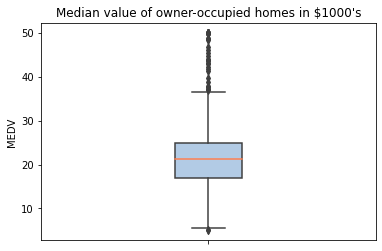

In [17]:

sns.boxplot(y=boston_df['MEDV'],
            width=0.2,
            boxprops={"facecolor": (.4, .6, .8, .5)},
            medianprops={"color": "coral"})
pyplot.title('Median value of owner-occupied homes in $1000\'s')
pyplot.show()


Conclusion: The median of the data is 20, with outliers mostly beyond the 3rd quartile of the data

Q2: Provide a  bar plot for the Charles river variable

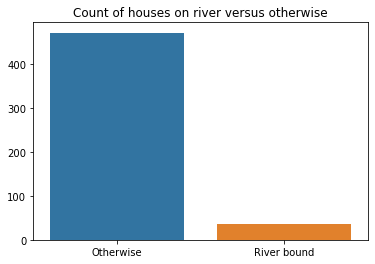

In [18]:
group_counts = boston_df.groupby('CHAS').count().iloc[:,0].values
labels = ['Otherwise','River bound']
sns.barplot(x=labels,
           y=group_counts)
pyplot.title('Count of houses on river versus otherwise');

Conclusion: Bar plot shows that less houses lie next to the river

Q3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

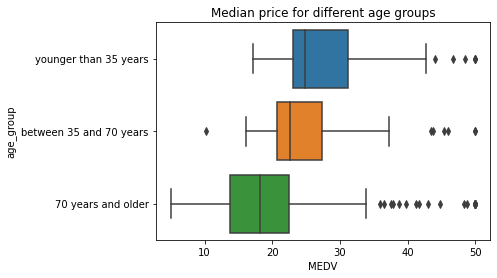

In [19]:

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = 'younger than 35 years'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

boston_df['age_group'] = pd.Categorical(boston_df['age_group'],
                                   categories=['younger than 35 years', 'between 35 and 70 years', '70 years and older'],
                                   ordered=True)

sns.boxplot(y=boston_df['age_group'],x=boston_df['MEDV'])
pyplot.title('Median price for different age groups');



Conclusion: Younger houses are more expensive, since they have a higher median value

Q4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?


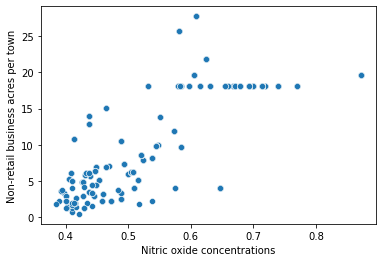

In [21]:

sns.scatterplot(x=boston_df['NOX'],y=boston_df['INDUS'])
pyplot.xlabel('Nitric oxide concentrations')
pyplot.ylabel('Non-retail business acres per town')
pyplot.show();

Inference: The two parameters appear to have a linear relantionship

Q5: Create a histogram for the pupil to teacher ratio variable

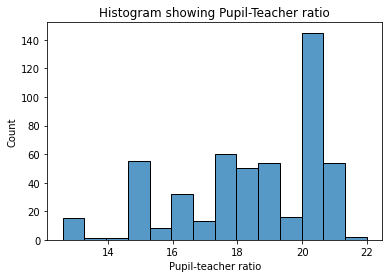

In [23]:
sns.histplot(boston_df['PTRATIO'])
pyplot.title('Histogram showing Pupil-Teacher ratio')
pyplot.xlabel('Pupil-teacher ratio')
pyplot.show()

There is a higher number of properties with higher teacher pupil ratio.

### Task 2

In [24]:
from scipy import stats

Q1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [25]:
med_other = boston_df['MEDV'][boston_df['CHAS']==0]
med_river = boston_df['MEDV'][boston_df['CHAS']==1]
print(stats.ttest_ind(med_other,med_river))

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)


Solution: <br>
null hypothesis = there is no difference in median values for houses on the river and houses otherwise<br>
Interpretation: Since the p value is smaller than 5%, we reject the null hypothesis. Hence, the median values are statistically different.

Q2:Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

Solution:<br>
null hypothesis = there is no difference in the Median values for each proportion of owner occupied units built prior to 1940 (AGE)

In [26]:

levene = stats.levene(boston_df[boston_df['age_group'] == 'younger than 35 years']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
print(levene)

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)


Since p is higher than 5%, we take it that the variance is equal and do an ANOVA

In [27]:
x1 = boston_df[boston_df['age_group'] == 'younger than 35 years']['MEDV']
x2 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
x3 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

print(stats.f_oneway(x1,x2,x3))

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)


Since the p value for ANOVA is less than 5%, we conclude that the means are statistically different, whilst rejecting the null hypothesis

Q3:Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? 

Solution:<br>
null hypothesis =  there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town


In [28]:
print(stats.pearsonr(x=boston_df['NOX'],y=boston_df['INDUS']))

(0.7636514469209151, 7.913361061238693e-98)


Interpretation: The p value is smaller than 5%. Hence we reject the null hypothesis. Therefore we conclude that there is a (strong) relation between the two va

Q4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


Solution<br>
null hypothesis = there is no relation between distance to five employment centers and median values

In [29]:
import statsmodels.api as sm
mod = sm.OLS(boston_df['DIS'], boston_df['MEDV'])
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                    DIS   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Wed, 09 Nov 2022   Prob (F-statistic):                   1.52e-146
Time:                        20:36:46   Log-Likelihood:                         -1127.4
No. Observations:                 506   AIC:                                      2257.
Df Residuals:                     505   BIC:                                      2261.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Interpretation: Since the p value is less than 5%, we reject the null hypothesis.<br>
This implies that the distance has a relationship with the median values. The r-squared value shows a rather strong linear relationship.